#                              Data Science Jobs Analysis

Data science is the domain of study that deals with vast volumes of data using modern tools and techniques to find unseen patterns, derive meaningful information, and make business decisions. Data science uses complex machine learning algorithms to build predictive models. The data used for analysis can come from many different sources and be presented in various formats. Data science is an essential part of many industries today, given the massive amounts of data that are produced, and is one of the most debated topics in IT circles.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('ds.salaries.csv')
df

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [4]:
df.shape

(607, 12)

In [5]:
df.duplicated().value_counts()

False    607
dtype: int64

as we see there is no null and duplicated values

### we can drop unnamed: 0 column as it not imp

In [6]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [7]:
df.head(7)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
5,2020,EN,FT,Data Analyst,72000,USD,72000,US,100,US,L
6,2020,SE,FT,Lead Data Scientist,190000,USD,190000,US,100,US,S


In [8]:
df.set_index('work_year',inplace=True)

In [9]:
 df.index.name=''

In [10]:
df.tail()

,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
,,,,,,,,,,
2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M
2022,MI,FT,AI Scientist,200000,USD,200000,IN,100,US,L


In [11]:
df.describe()

,salary,salary_in_usd,remote_ratio
count,6.070000e+02,607.000000,607.00000
mean,3.240001e+05,112297.869852,70.92257
std,1.544357e+06,70957.259411,40.70913
min,4.000000e+03,2859.000000,0.00000
25%,7.000000e+04,62726.000000,50.00000
50%,1.150000e+05,101570.000000,100.00000
75%,1.650000e+05,150000.000000,100.00000
max,3.040000e+07,600000.000000,100.00000


In [12]:
df.dtypes

experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

## Add new column based on the Salary Currency column

In [13]:
df.salary_currency.unique()

array(['EUR', 'USD', 'GBP', 'HUF', 'INR', 'JPY', 'CNY', 'MXN', 'CAD',
       'DKK', 'PLN', 'SGD', 'CLP', 'BRL', 'TRY', 'AUD', 'CHF'],
      dtype=object)

In [14]:
def country(row):
    if row['salary_currency']=='EUR':
        return 'EuropeArea'
    elif row['salary_currency']=='USD':
        return 'USA'
    elif row['salary_currency'] == 'GBP':
        return 'UK'
    elif row['salary_currency'] == 'INR':
        return 'India'
    elif row['salary_currency'] == 'CAD':
        return 'Canada'
    elif row['salary_currency'] == 'JPY':
        return 'Japan'
    elif row['salary_currency'] == 'PLN':
        return 'Poland'
    elif row['salary_currency'] == 'TRY':
        return 'Turkey'
    elif row['salary_currency'] == 'CNY':
        return 'China'
    elif row['salary_currency'] == 'MXN':
        return 'Mexico'
    elif row['salary_currency'] == 'HUF':
        return 'Hungary'
    elif row['salary_currency'] == 'DKK':
        return 'Denmark'
    elif row['salary_currency'] == 'BRL':
        return 'Brazil'
    elif row['salary_currency'] == 'AUD':
        return 'Australia'
    elif row['salary_currency'] == 'CLP':
        return 'Chile'
    elif row['salary_currency'] == 'CHF':
        return 'Switzerland'

In [15]:
df['Country']=df.apply(lambda row:country(row),axis=1)

In [16]:
df.head()

,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,Country
,,,,,,,,,,,
2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L,EuropeArea
2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S,USA
2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M,UK
2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S,USA
2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L,USA


# UniVariate Analysis
- job Count Based on:<br>
Experience Level<br>
Employment Type<br>
Company Size<br>
Remote Ratio<br>

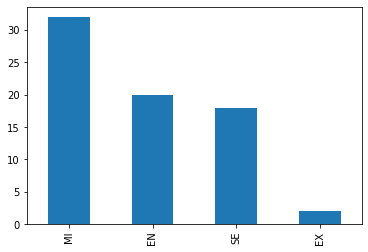

In [17]:
df['experience_level'][df.index==2020].value_counts().plot.bar();

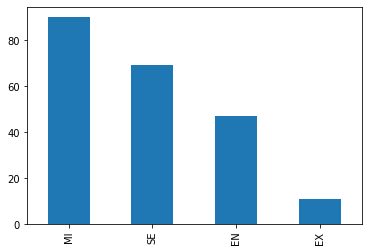

In [18]:
df['experience_level'][df.index==2021].value_counts().plot.bar();

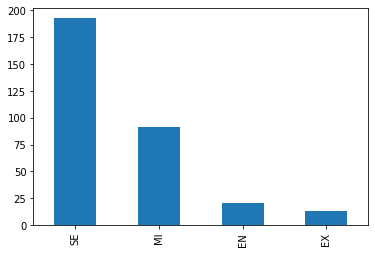

In [19]:
df['experience_level'][df.index==2022].value_counts().plot.bar();

- lets compare above plots together

In [20]:
df1=df[df.index==2020]
df2=df[df.index==2021]
df3=df[df.index==2022]

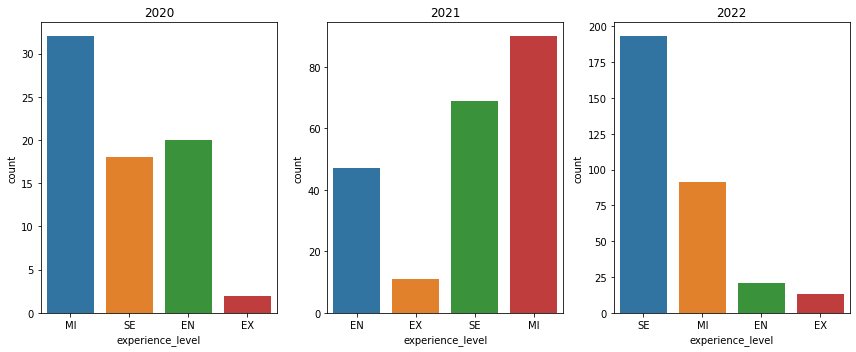

In [21]:
fig,axe=plt.subplots(1,3,figsize=(12,5))
fig1=sns.countplot(df1,x='experience_level',ax=axe[0],)
fig1.set_title('2020')
plt.tight_layout();
fig2=sns.countplot(df2,x='experience_level',ax=axe[1])
fig2.set_title('2021')
plt.tight_layout();
fig3=sns.countplot(df3,x='experience_level',ax=axe[2])
fig3.set_title('2022')
plt.tight_layout();

- We can see that there are more jobs for entry level in 2021 compare to 2020 and 2022
- we can see that medium level jobs are increased from 2020 to 2021 and after that it is not increased
- we can see that senior level jobs are increased from 2020-2022 and in the year 2022 jobs for se is large compared to 2020  and 2021
- But for executive level experience the job count is down in all the three years, there is no major increase in the job count -from 2021 to 2022

## jobs count based on employee types

In [22]:
df1.employment_type.value_counts()

FT    68
PT     2
CT     1
FL     1
Name: employment_type, dtype: int64

In [23]:
df2.employment_type.value_counts()

FT    206
PT      6
CT      3
FL      2
Name: employment_type, dtype: int64

In [24]:
df3.employment_type.value_counts()

FT    314
PT      2
FL      1
CT      1
Name: employment_type, dtype: int64

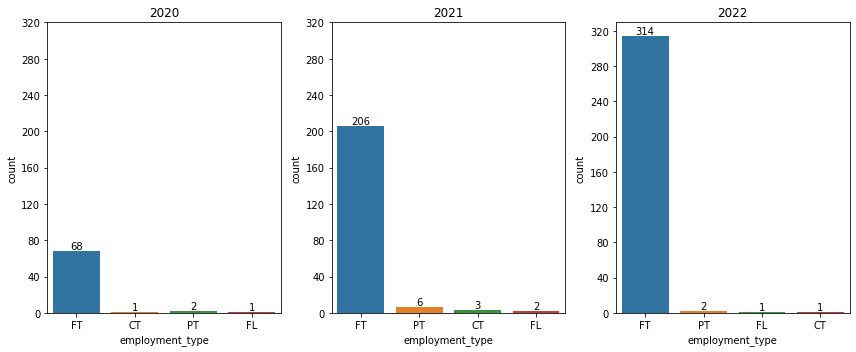

In [25]:
fig,axe=plt.subplots(1,3,figsize=(12,5))
fig1=sns.countplot(data=df1,x='employment_type',ax=axe[0],)
fig1.set_title('2020')
fig1.set_yticks([0,40,80,120,160,200,240,280,320])
fig.tight_layout();
for i in fig1.containers:
    fig1.bar_label(i,)
fig2=sns.countplot(df2,x='employment_type',ax=axe[1])
fig2.set_title('2021')
fig2.set_yticks([0,40,80,120,160,200,240,280,320])
plt.tight_layout();
for i in fig2.containers:
    fig2.bar_label(i,)
fig3=sns.countplot(df3,x='employment_type',ax=axe[2])
fig3.set_title('2022')
fig3.set_yticks([0,40,80,120,160,200,240,280,320])
plt.tight_layout();
for i in fig3.containers:
    fig3.bar_label(i,)

- for the year 2020-2022 the full time jobs have increased tremendously

## jobs count based on company size

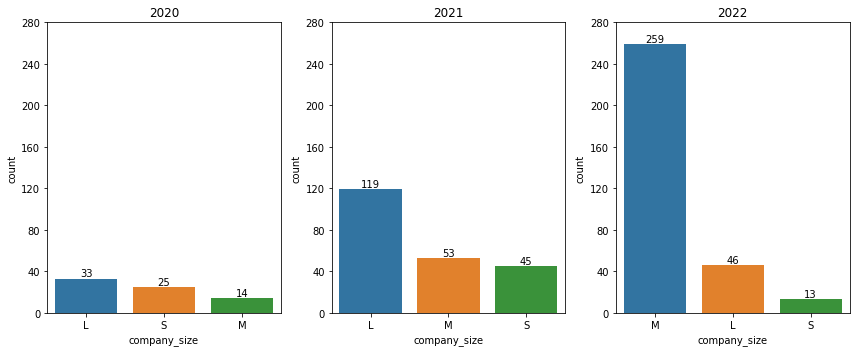

In [133]:
fig,axe=plt.subplots(1,3,figsize=(12,5))
fig1=sns.countplot(data=df1,x='company_size',ax=axe[0],)
fig1.set_title('2020')
fig1.set_yticks([0,40,80,120,160,200,240,280])
fig.tight_layout();
for i in fig1.containers:
    fig1.bar_label(i,)
fig2=sns.countplot(df2,x='company_size',ax=axe[1])
fig2.set_title('2021')
fig2.set_yticks([0,40,80,120,160,200,240,280])
plt.tight_layout();
for i in fig2.containers:
    fig2.bar_label(i,)
fig3=sns.countplot(df3,x='company_size',ax=axe[2])
fig3.set_title('2022')
fig3.set_yticks([0,40,80,120,160,200,240,280])
plt.tight_layout();
for i in fig3.containers:
    fig3.bar_label(i,)

- as we can see 2020 have lowest jobs may be it is because of pandemic.
- but we can see that 2022 medium size companyies has hired many pepople.
- we can see that low and small size company have low jobs opening in 2022.
- we can see from that small size companies have lowest job opening throughout 2020-22 years. may be due to the effect of pandemic

## Job count based on remote

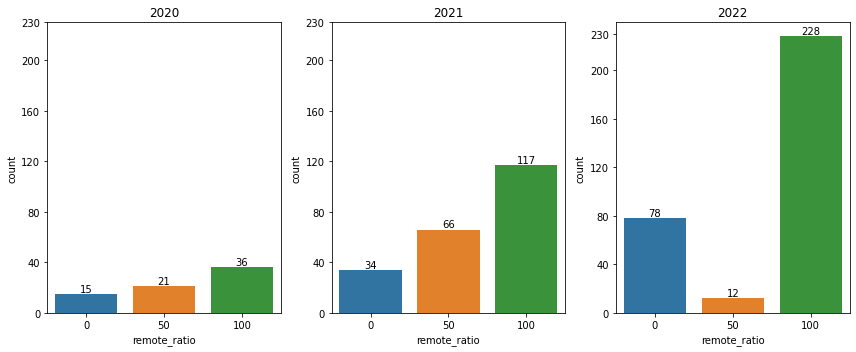

In [27]:
fig,axe=plt.subplots(1,3,figsize=(12,5))
fig1=sns.countplot(data=df1,x='remote_ratio',ax=axe[0])
fig1.set_title('2020')
fig1.set_yticks([0,40,80,120,160,200,230])
fig.tight_layout();
for i in fig1.containers:
    fig1.bar_label(i,)
fig2=sns.countplot(df2,x='remote_ratio',ax=axe[1])
fig2.set_title('2021')
fig2.set_yticks([0,40,80,120,160,200,230])
plt.tight_layout();
for i in fig2.containers:
    fig2.bar_label(i,)
fig3=sns.countplot(df3,x='remote_ratio',ax=axe[2])
fig3.set_title('2022')
fig3.set_yticks([0,40,80,120,160,200,230])
plt.tight_layout();
for i in fig3.containers:
    fig3.bar_label(i,)

- Again we can find that Year 2020 was the bad time for employment, as the job count for all three Job Working Style has less in numbers as compared to other years.
- we can find that 2021 was the best period for the Hybrid Mode Job as compared to 2020 and 2022.

## top ranked jobs

In [28]:
df.head()

,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,Country
,,,,,,,,,,,
2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L,EuropeArea
2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S,USA
2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M,UK
2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S,USA
2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L,USA


In [29]:
top2020_ranked_jobs=df1.job_title.value_counts()[:3]
top2021_ranked_jobs=df2.job_title.value_counts()[:3]
top2022_ranked_jobs=df3.job_title.value_counts()[:3]

In [30]:
top2020_ranked_jobs.values
top2020_ranked_jobs.index

Index(['Data Scientist', 'Data Engineer', 'Data Analyst'], dtype='object')

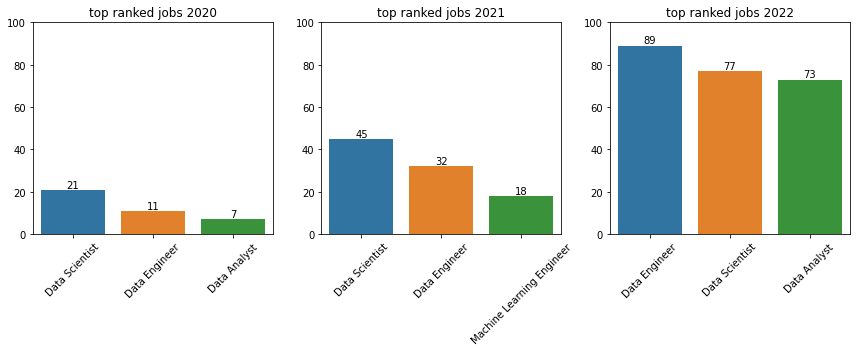

In [31]:
fig,axe=plt.subplots(1,3,figsize=(12,5))
fig1=sns.barplot(x=top2020_ranked_jobs.index,y=top2020_ranked_jobs.values,ax=axe[0])
fig1.set_title('top ranked jobs 2020')
fig1.set_yticks([0,20,40,60,80,100])
fig1.set_xticklabels(fig1.get_xticklabels(),rotation=45)
fig.tight_layout();
for i in fig1.containers:
    fig1.bar_label(i,)
fig2=sns.barplot(x=top2021_ranked_jobs.index,y=top2021_ranked_jobs.values,ax=axe[1])
fig2.set_title('top ranked jobs 2021')
fig2.set_yticks([0,20,40,60,80,100])
fig2.set_xticklabels(fig2.get_xticklabels(),rotation=45)
plt.tight_layout();
for i in fig2.containers:
    fig2.bar_label(i,)
fig3=sns.barplot(x=top2022_ranked_jobs.index,y=top2022_ranked_jobs.values,ax=axe[2])
fig3.set_title('top ranked jobs 2022')
fig3.set_yticks([0,20,40,60,80,100])
fig3.set_xticklabels(fig3.get_xticklabels(),rotation=45)
plt.tight_layout();
for i in fig3.containers:
    fig3.bar_label(i,)

- From 2020 to 2022, there is a steady increase in the job count in Data Scientist. Also it holds the first position among all other jobs in the year 2020 and 2021.
- After two years Data Engineer job takes first position among all other jobs in 2022 and after two years Data Scientist job takes second position.
- Only in 2021 machine learning engineer comes in third place otherwise data analyst was third highest job in rest of the years.

## Top ranked salary

In [32]:
salary_2020=df1.groupby('job_title')['salary_in_usd'].mean().reset_index()
salary_2020=salary_2020.nlargest(3,['salary_in_usd'])
salary_2021=df2.groupby('job_title')['salary_in_usd'].mean().reset_index()
salary_2021=salary_2021.nlargest(3,['salary_in_usd'])
salary_2022=df3.groupby('job_title')['salary_in_usd'].mean().reset_index()
salary_2022=salary_2022.nlargest(3,['salary_in_usd'])

In [33]:
salary_2020

,job_title,salary_in_usd
11,Director of Data Science,325000.0
19,Machine Learning Scientist,260000.0
22,Research Scientist,246000.0


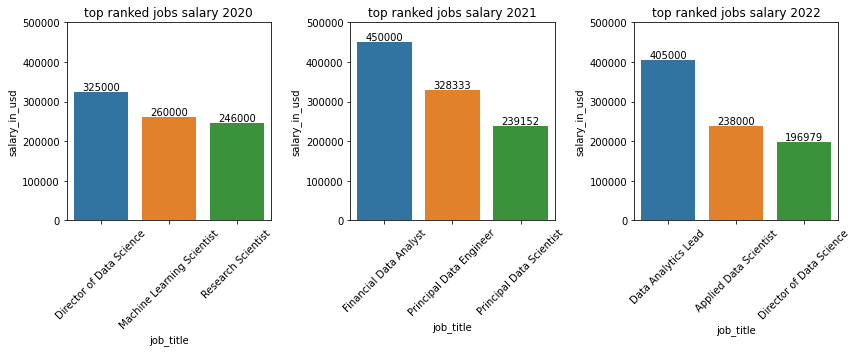

In [34]:
fig,axe=plt.subplots(1,3,figsize=(12,5))
fig1=sns.barplot(x=salary_2020.job_title,y=salary_2020.salary_in_usd,ax=axe[0])
fig1.set_title('top ranked jobs salary 2020')
fig1.set_yticks([0,100000,200000,300000,400000,500000])
fig1.set_xticklabels(fig1.get_xticklabels(),rotation=45)
fig.tight_layout();
for i in fig1.containers:
    fig1.bar_label(i,)
fig2=sns.barplot(x=salary_2021.job_title,y=salary_2021.salary_in_usd,ax=axe[1])
fig2.set_title('top ranked jobs salary 2021')
fig2.set_yticks([0,100000,200000,300000,400000,500000])
fig2.set_xticklabels(fig2.get_xticklabels(),rotation=45)
plt.tight_layout();
for i in fig2.containers:
    fig2.bar_label(i,)
fig3=sns.barplot(x=salary_2022.job_title,y=salary_2022.salary_in_usd,ax=axe[2])
fig3.set_title('top ranked jobs salary 2022')
fig3.set_yticks([0,100000,200000,300000,400000,500000])
fig3.set_xticklabels(fig3.get_xticklabels(),rotation=45)
plt.tight_layout();
for i in fig3.containers:
    fig3.bar_label(i,)

- The top three ranked salaries from 2020 to 2022 are the only jobs for directors of data science. Which has highest salary in 2020 (i.e. 325000 in USD) and 3rd highest salary in 2022 (around 197000 in USD).
- In all the three years we can find that the top paid jobs are Financial Data Analyst with an average salary of USD 450000 in 2021, Data Analytics Lead with an average salary of USD 405000 in 2022 and Principal Data Engineer with an average salary of USD 328333 in 2021.

## Top ranked salary offering country

In [35]:
df.head()

,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,Country
,,,,,,,,,,,
2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L,EuropeArea
2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S,USA
2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M,UK
2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S,USA
2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L,USA


In [36]:
contry_wise_salary2020=df1.groupby(['Country','job_title','salary_currency'])['salary'].mean().reset_index()
contry_wise_salary2020=contry_wise_salary2020.nlargest(5,'salary')
contry_wise_salary2020

,Country,job_title,salary_currency,salary
12,Hungary,Data Scientist,HUF,11000000.0
17,Japan,Data Engineer,JPY,4450000.0
15,India,Data Scientist,INR,3000000.0
18,Mexico,Data Engineer,MXN,720000.0
13,India,Data Analyst,INR,450000.0


In [37]:
contry_wise_salary2021=df2.groupby(['Country','job_title','salary_currency'])['salary'].mean().reset_index()
contry_wise_salary2021=contry_wise_salary2021.nlargest(5,'salary')
contry_wise_salary2021

,Country,job_title,salary_currency,salary
8,Chile,Data Scientist,CLP,30400000.0
24,Hungary,BI Data Analyst,HUF,11000000.0
34,Japan,ML Engineer,JPY,7750000.0
29,India,Data Science Manager,INR,5500000.0
33,India,Machine Learning Engineer,INR,3349998.5


In [38]:
contry_wise_salary2022=df3.groupby(['Country','job_title','salary_currency'])['salary'].mean().reset_index()
contry_wise_salary2022=contry_wise_salary2022.nlargest(5,'salary')
contry_wise_salary2022

,Country,job_title,salary_currency,salary
21,India,Head of Machine Learning,INR,6000000.0
20,India,Data Scientist,INR,1900000.0
19,India,Business Data Analyst,INR,1400000.0
36,USA,Data Analytics Lead,USD,405000.0
4,Canada,Director of Data Science,CAD,250000.0


C:\Users\91901\AppData\Local\Temp\ipykernel_17420\420176835.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  fig1.set_xticklabels(fig1.get_xticklabels(),rotation=45)
C:\Users\91901\AppData\Local\Temp\ipykernel_17420\420176835.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  fig2.set_xticklabels(fig2.get_xticklabels(),rotation=45)
C:\Users\91901\AppData\Local\Temp\ipykernel_17420\420176835.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  fig3.set_xticklabels(fig3.get_xticklabels(),rotation=45)


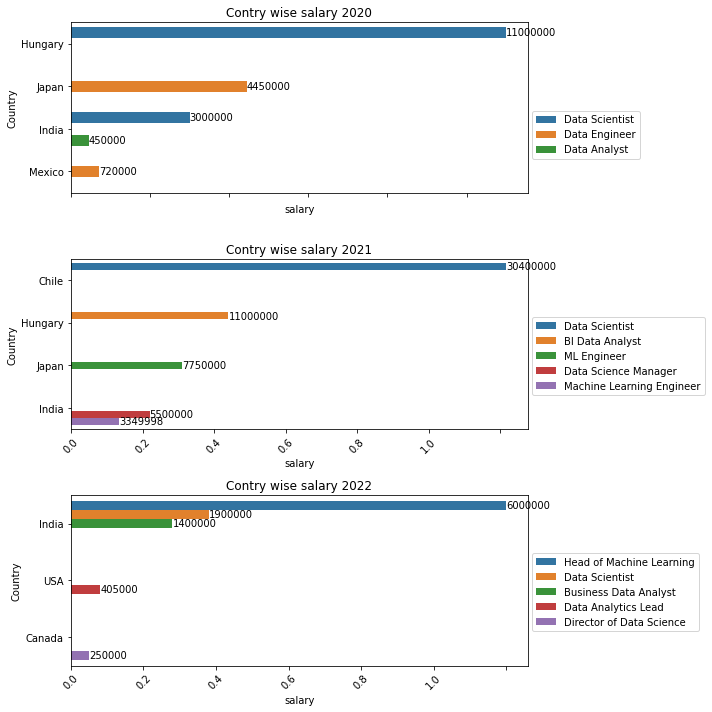

In [39]:
fig,axe=plt.subplots(3,1,figsize=(10,10))
fig1=sns.barplot(y=contry_wise_salary2020.Country,x=contry_wise_salary2020.salary,ax=axe[0],hue=contry_wise_salary2020.job_title)
fig1.set_title('Contry wise salary 2020')
fig1.set_xticklabels(fig1.get_xticklabels(),rotation=45)
fig.tight_layout();
fig1.legend(loc=(1.01,0.2))
for i in fig1.containers:
    fig1.bar_label(i,fmt='%d')
fig2=sns.barplot(y=contry_wise_salary2021.Country,x=contry_wise_salary2021.salary,ax=axe[1],hue=contry_wise_salary2021.job_title)
fig2.set_title('Contry wise salary 2021')
fig2.set_xticklabels(fig2.get_xticklabels(),rotation=45)
plt.tight_layout();
fig2.legend(loc=(1.01,0.2))
for i in fig2.containers:
    fig2.bar_label(i,fmt='%d')
fig3=sns.barplot(y=contry_wise_salary2022.Country,x=contry_wise_salary2022.salary,ax=axe[2],hue=contry_wise_salary2022.job_title)
fig3.set_title('Contry wise salary 2022')
fig3.set_xticklabels(fig3.get_xticklabels(),rotation=45)
plt.tight_layout();
fig3.legend(loc=(1.01,0.2))
for i in fig3.containers:
    fig3.bar_label(i,fmt='%d')

- from the above we can see that India offers more salary 2020 - 2022 and from the graph we can see that head of machine learning is the highest paid in india and second is data scientist

In [60]:
df.job_title.value_counts()

Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Principal Data Scientist                      7
AI Scientist                                  7
Data Science Consultant                       7
Director of Data Science                      7
Data Analytics Manager                        7
ML Engineer                                   6
Computer Vision Engineer                      6
BI Data Analyst                               6
Lead Data Engineer                            6
Data Engineering Manager                      5
Business Data Analyst                         5
Head of Data                            

In [64]:
df['job_title'].isin(['ML']).sum()## this will check if the each row have exact 'ML' them or not

0

In [80]:
machine_learnng_jobs=df.job_title.str.contains('Machine Learning').sum()
machine_learnng_jobs+=df['job_title'].str.contains('ML').sum()            ## this line will checks substring ml
analyst_jobs=df['job_title'].str.contains('Analyst').sum() 
data_scientist_jobs=df['job_title'].str.contains('Data Scientist').sum() 
data_scientist_jobs+=df['job_title'].str.contains('Data Science').sum()
data_engineer_jobs=df['job_title'].str.contains('Data Engineer').sum()
data_engineer_jobs+=df['job_title'].str.contains('Data Engineering').sum()

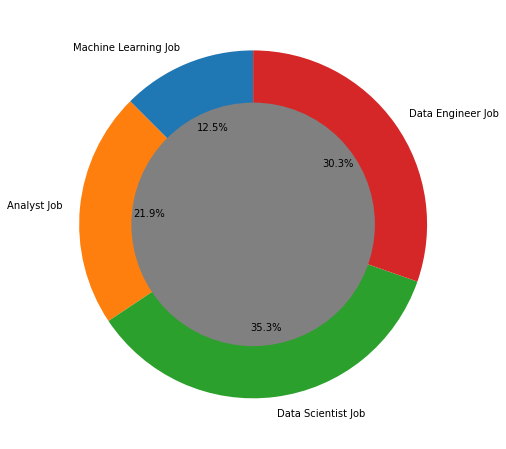

In [96]:
labels = 'Machine Learning Job', 'Analyst Job', 'Data Scientist Job', 'Data Engineer Job'
sizes = [machine_learnng_jobs,analyst_jobs,data_scientist_jobs,data_engineer_jobs]

fig1, ax1 = plt.subplots(figsize=(12,8))
ax1.pie(sizes, labels=labels, startangle=90, autopct='%1.1f%%')
circle = plt.Circle(xy = (0,0), radius = .7, facecolor = 'grey')
plt.gca().add_artist(circle)
plt.show;

- Here we conclude that most of the job posts are related to Data Scientist, the second highest being Data Engineer, Machine Learning and Analyst with equal proportion.

## Lets now analyze salary variations based on varies features/columns

In [134]:
year=df.pivot_table(index=df.index,values='salary_in_usd',columns='experience_level')
year

experience_level,EN,EX,MI,SE
,,,,
2020,63648.600000,202416.500000,85950.062500,137240.500000
2021,59101.021277,223752.727273,85490.088889,126596.188406
2022,65423.428571,178313.846154,91193.956044,143043.398964


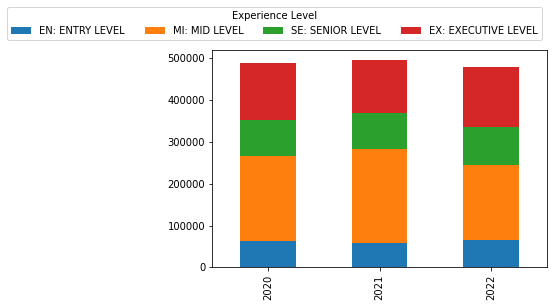

In [109]:
year.plot(kind='bar',stacked=True)
plt.legend( ['EN: ENTRY LEVEL', 'MI: MID LEVEL', 'SE: SENIOR LEVEL', 'EX: EXECUTIVE LEVEL'],
           bbox_to_anchor =(1.00, 1.22), ncol = 4, title = "Experience Level")

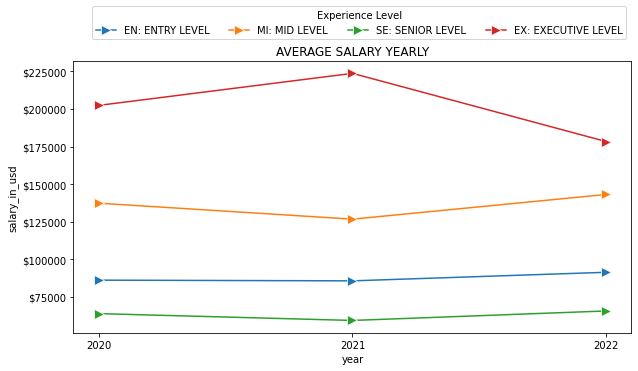

In [131]:
## another approach
plt.figure(figsize=(10,5))
chart = sns.lineplot(x=df.index, y="salary_in_usd", data=df, hue = "experience_level", marker= ">",markersize = 10, errorbar= None)
chart.set(title= 'AVERAGE SALARY YEARLY')
chart.set_xticks([2020,2021,2022])
chart.yaxis.set_major_formatter('${x:1.0f}')
plt.legend( ['EN: ENTRY LEVEL', 'MI: MID LEVEL', 'SE: SENIOR LEVEL', 'EX: EXECUTIVE LEVEL'],bbox_to_anchor =(1.00, 1.22), ncol = 4, title = "Experience Level")
plt.xlabel('year')
fig.tight_layout()

- For Entry Level and Mid Level There was no such difference in average salary during 2020-22. Only in the year 2021, there has been some decrease in it. From 2020 to 2022, salaries for entry-level experience remained below USD 75000, and for mid-level experience it remained between USD 75000 to 100000.

- For Senior Level Average salary decreased slightly in 2021 but increased to around 150000 USD in 2022.

- For Executive Level This is the only experience that had the highest average salary in 2021 relative to experience at the rest of the level, but also had a decline in average salary in 2022 relative to all other categories. In 2020 it was around 200000 USD, in 2021 it increased to around 225000 USD, but in 2022 it fell to around 185000 USD, which was the lowest average salary of this category during 3 years.

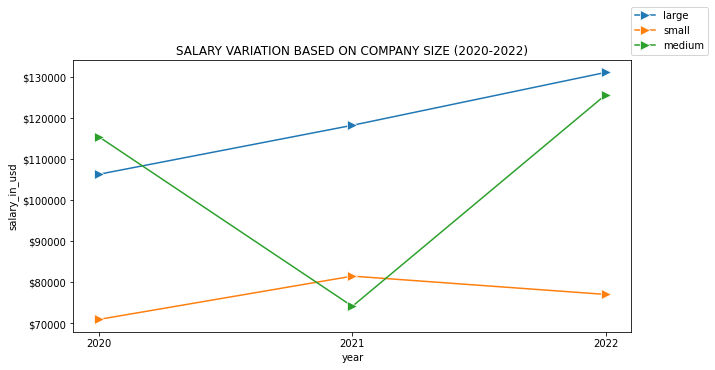

In [143]:
plt.figure(figsize=(10,5))
chart = sns.lineplot(x=df.index, y="salary_in_usd", data=df, hue = "company_size", marker= ">",markersize = 10, errorbar= None)
plt.title('SALARY VARIATION BASED ON COMPANY SIZE (2020-2022)')
chart.set_xticks([2020,2021,2022])
chart.yaxis.set_major_formatter('${x:1.0f}')
plt.legend(['large','small','medium'],loc=(1,1.02))
plt.xlabel('year')
fig.tight_layout()

- For small size companies In 2020 we can find that the average salary of an employee was around 70000 USD but in 2021 it was increased by around 10000 USD and in 2022 it was cut by around 3000 USD.

- For medium sized companies The average salary of an employee in the year 2020 was between 110000 and 120000 USD. In 2021, it was reduced to between 70000 and 80000 USD, which can be considered as the biggest decline during the whole 3 years. But in 2022 it again increased to between 120000 and 130000 USD.

- For large sized companies Average salary of an employee increased continuously during the 3 year period (2020-22). Firstly in 2020 it was between 100000 and 110000 USD and in 2021 it was between 110000 and 120000 USD and in 2022 it was between 120000 and 130000 USD. So we can say that it was increased by 10000 USD every year.

- Conclusion It is clear that larger size companies can afford higher number of employees and their higher wages. But in medium-sized companies, it may happen that they can reduce the number of employees as well as the salary amount. And it's rare to see any big difference in pay differentials at smaller-sized companies.

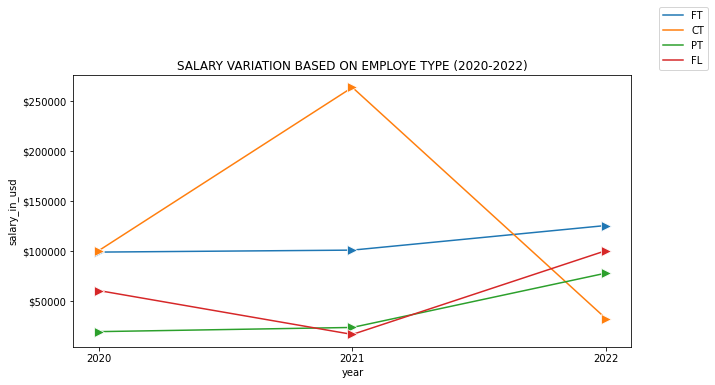

In [149]:
plt.figure(figsize=(10,5))
chart = sns.lineplot(x=df.index, y="salary_in_usd", data=df, hue = "employment_type", marker= ">",markersize = 10, errorbar= None)
plt.title('SALARY VARIATION BASED ON EMPLOYE TYPE (2020-2022)')
chart.set_xticks([2020,2021,2022])
chart.yaxis.set_major_formatter('${x:1.0f}')
plt.legend(loc=(1.05,1.02))
plt.xlabel('year')
fig.tight_layout()

- For Part Time Jobs The average salary in this category had a steady increase for all three years, it was 20000 USD in 2020, increased slightly to around 25000 USD in 2021 and then to around 75000 USD in 2022.

- For Freelancer Jobs The average salary in 2020 was around 60000 USD and in 2021 it decreased to around 22000 USD and in 2022 it again increased to around 90000 USD.

- For Full Time Jobs Like part time jobs, the average salary for this category also continued to increase over the course of 3 years. Earlier it was around 100000 USD and in 2021 it increased very little after which it increased to around 100500 USD and in 2022 it again increased to around 110000 USD.

- For contract based jobs The average salary for this category in the year 2020 was same as full time jobs Average salary in 2020. In 2021, it has increased to between 250000 and 280000 USD, which can be considered as the biggest increase during the whole 3 years. But in 2022, it was reduced again to about 25000 USD, which was similar to the average salary of part-time jobs in the year 2021. And we can consider this as the biggest fall in the entire 3 years.

- Conclusion Here we can conclude that the average salary package for full time jobs has been highest as compared to part time jobs and freelancer jobs except in the year 2020 and 2021 so it is likely to remain highest in future also . Since it was the covid period, when most of the companies were moving towards work from home mode or trying to reduce the number of employees, that period gave more opportunities for contract time based jobs.

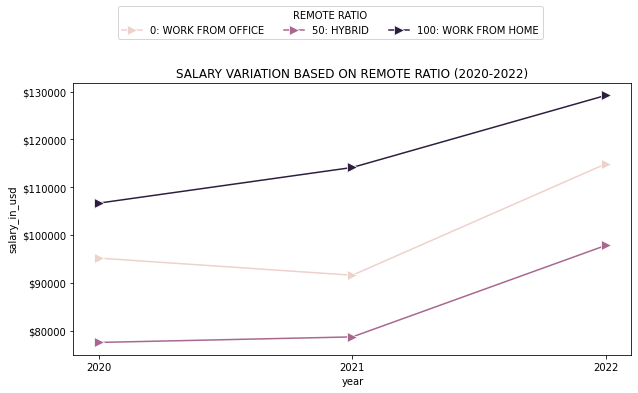

In [152]:
plt.figure(figsize=(10,5))
chart = sns.lineplot(x=df.index, y="salary_in_usd", data=df, hue = "remote_ratio", marker= ">",markersize = 10, errorbar= None)
plt.title('SALARY VARIATION BASED ON REMOTE RATIO (2020-2022)')
chart.set_xticks([2020,2021,2022])
chart.yaxis.set_major_formatter('${x:1.0f}')
plt.legend(['0: WORK FROM OFFICE', '50: HYBRID', '100: WORK FROM HOME'],bbox_to_anchor =(0.85, 1.30), ncol = 4, title = "REMOTE RATIO")
plt.xlabel('year')
fig.tight_layout()

- For Hybrid Working Mode The average salary in the year 2020 was less than 80000 USD. And increased in 2021 but by a very small amount, after which it was around 80000 USD. But in 2022 it had increased to about 15000 USD and after that it had become about 95000 USD.

- For work from office mode The average salary in 2020 was between 90000 and 100000 USD and in 2021 it decreased to around 91000 USD and in 2022 it again increased to around 112000 USD.

- For work from home mode The average salary in 2020 was between 100000 and 110000 USD and in 2021 it increased to around 112000 USD and in 2022 it again increased to around 130000 USD.

- Conclusion Here we can conclude that the average salary package for work from home mode jobs is highest as compared to work from office and hybrid mode jobs.

In [178]:
company_size_remote_ratio=df.pivot_table(index=df.company_size,columns='remote_ratio')
company_size_remote_ratio

salary                                salary_in_usd  \
remote_ratio            0              50             100            0     
company_size                                                               
L             426512.500000  824074.583333  513763.179245  120855.875000   
M             140488.303797  172729.714286  146196.615044  108747.012658   
S             184862.500000  945666.666667  232043.489796   65539.687500   

                                           
remote_ratio           50             100  
company_size                               
L             89724.233333  135464.820755  
M             61835.000000  124874.482301  
S             73305.055556   83171.142857

In [183]:
result_company_ratio=pd.crosstab(
index=df['company_size'],
columns=df['remote_ratio'],
normalize='index').round(4)*100 
result_company_ratio

remote_ratio,0,50,100
company_size,,,
L,16.16,30.30,53.54
M,24.23,6.44,69.33
S,19.28,21.69,59.04


In [168]:
?pd.crosstab

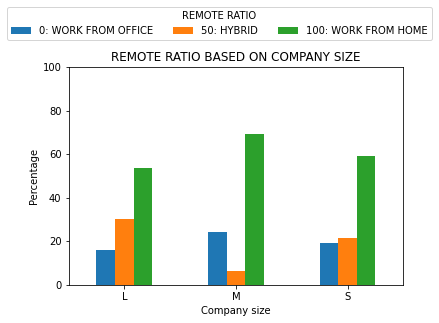

In [171]:
result_company_ratio.plot(kind='bar',rot=0, label='Remote ratio')
plt.title('REMOTE RATIO BASED ON COMPANY SIZE')
plt.ylabel('Percentage')
plt.ylim(bottom=0, top=100)
plt.xlabel('Company size')
plt.legend(['0: WORK FROM OFFICE', '50: HYBRID', '100: WORK FROM HOME'],bbox_to_anchor =(1.10, 1.30), ncol = 4, title = "REMOTE RATIO")

- Conclusion: As we can see all companies, regardless of their company size, offer a high proportion of fully remote jobs and medium sized companies are offering fully remote jobs. Hybrid mode jobs are also preferred over work from office except in medium sized companies.

In [185]:
result_company_ratio=pd.crosstab(
index=df['experience_level'],
columns=df['remote_ratio'],
normalize='index').round(4)*100 

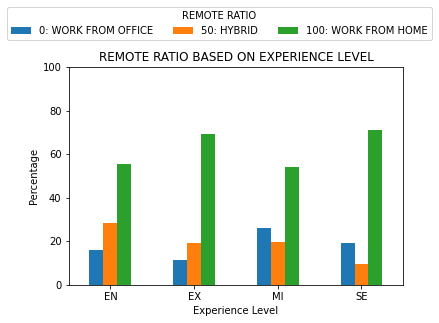

In [186]:
result_company_ratio.plot(kind='bar', rot=0, label='Remote ratio')
plt.title('REMOTE RATIO BASED ON EXPERIENCE LEVEL')
plt.ylabel('Percentage')
plt.ylim(bottom=0, top=100)
plt.xlabel('Experience Level')
plt.legend(['0: WORK FROM OFFICE', '50: HYBRID', '100: WORK FROM HOME'],
           bbox_to_anchor =(1.10, 1.30), ncol = 4, title = "REMOTE RATIO");

- At first I was expecting that entry level positions would have the highest percentage of working from the office but here overall the percentage of working from home is highest.

- If we consider all three ways of working for all four experience levels, we can find that working full time from home is the most offered way of working.

- Hybrid working mode is the most offered way of working compared to working from office for entry level and executive level. For mid-level and senior level, working from office is the more proposed mode as compared to hybrid mode.

- If we look at fully remote work, senior and executive jobs as a whole provide the highest percentage of fully remote positions.

## CONCLUSION:

### JOBS
- Working year 2020 was the worst year for job seekers.
- Working year 2022 was golden year for job seekers
- Senior Level Experience has the top jobs count and Medium level has the second Highest.
- Full Time Job has the Highest job count.
- Majority of the Jobs are based on fully Work from Home and Work from Office has the second Highest.
- Majority of the jobs are offerd by the medium sized companies.
- Majority of jobs are based on Data Scientist Post then Data Engineer after that Data Analyst and Machine Learning.

### SALARY
- It is clear that larger size companies can afford higher number of employees and their higher wages. But in medium-sized companies, it may happen that they can reduce the number of employees as well as the salary amount. And it's rare to see any big difference in pay differentials at smaller-sized companies.

- The average salary package for full time jobs has been highest as compared to part time jobs and freelancer jobs except in the year 2020 and 2021 so it is likely to remain highest in future also . Since it was the covid period, when most of the companies were moving towards work from home mode or trying to reduce the number of employees, that period gave more opportunities for contract time based jobs.

- The average salary package for work from home mode jobs is highest as compared to work from office and hybrid mode jobs.